<a href="https://colab.research.google.com/github/Racoo203/TC2004B.101/blob/main/M2-Act1/EjercicioTitanic_RaulCorreaOca%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad M2.1 Google Colab - Operaciones con dataframes
## Raúl Correa Ocañas - A01722401

In [1]:
import pandas as pd

## Lectura de Datos

In [2]:
# Prepara Google Colab para acceder a datos en Google Drive (mount)
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Guarda en un dataframe el contenido del dataset titanic
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/TC2004B.101/data/titanic.csv')

In [4]:
# Muestra los datos de los primeros 10 registros.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Descripción de Variables

In [5]:
# Indica cuántos registros se tienen en total

# len(df) diría el numero de registros, pero evidentemente df.shape da más información (rows, cols)
# rows siendo el numero de registros u observaciones
df.shape

(891, 12)

In [6]:
# Cuáles tienen valores nulos y cuáles no tienen valores nulos?

# Cuántas filas tienen no tienen NAs?
print(len(df.dropna()), "Filas no tienen NAs")
# por inferencia,
print(len(df) - len(df.dropna()), "Filas tienen NAs")

183 Filas no tienen NAs
708 Filas tienen NAs


In [7]:
# Así como el tipo de dato de cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Identifica el tipo de variables presentes en el dataset, y en una celda de texto indica cuáles variables son categóricas y cuáles numéricas**

Variables Categoricas:
- Survived: 0 = No, 1 = Yes
- Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- Embarked: C = Cherbourg, Q = Queenstown, S = Southampton
- Sex: male, female

Variables Numéricas:
- PassengerId
- Age
- SibSp
- Parch
- Fare

Otros:
- Name
- Ticket
- Cabin





## Exploración y Análisis de Datos

In [8]:
# Muestra un resumen estadístico de las variables cualitativas, incluyendo survived y pclass.
# Puedes cambiar su tipo de dato usando la función de pandas astype

df.Survived = df.Survived.astype('object')
df.Pclass = df.Pclass.astype('object')

In [9]:
# Muestra un resumen estadístico de las variables cuantitativas.
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Analiza la información y contesta las siguientes preguntas:
# ¿Cuál es la tarifa más barata?
# ¿Cuál es el promedio de edad?
min_fare = df.describe()['Fare']['min']
mean_age = df.describe()['Age']['mean']
print("%.2f es la tarifa más barata." % min_fare)
print("%.2f es la edad promedio." % mean_age)

0.00 es la tarifa más barata.
29.70 es la edad promedio.


In [11]:
# Muestra un resumen estadístico de las variables cualitativas
temp = df.select_dtypes('object')
temp.describe()

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,2,3,891,2,681,147,3
top,0,3,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,549,491,1,577,7,4,644


In [12]:
# Mostrar los pasajeros que iban en primera clase, ordenadas alfabéticamente por nombre.
temp = df[['Name','Pclass']]
temp = temp.loc[df.Pclass == 3]
temp = temp.sort_values('Name')
temp

,Name,Pclass
845,"Abbing, Mr. Anthony",3
746,"Abbott, Mr. Rossmore Edward",3
279,"Abbott, Mrs. Stanton (Rosa Hunt)",3
365,"Adahl, Mr. Mauritz Nils Martin",3
401,"Adams, Mr. John",3
...,...,...
559,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",3
286,"de Mulder, Mr. Theodore",3
282,"de Pelsmaeker, Mr. Alfons",3
153,"van Billiard, Mr. Austin Blyler",3


In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

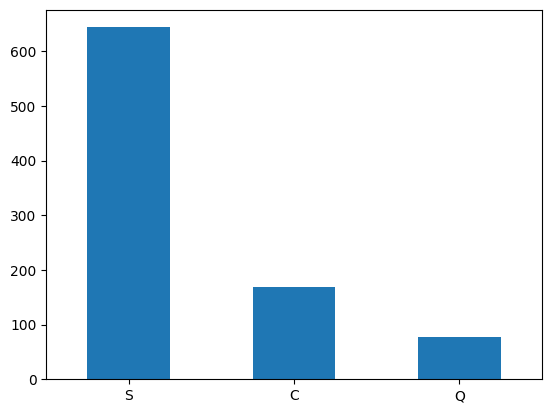

In [14]:
# Indica la distribución de frecuencias de la columna embarked, así como la gráfica de barras correspondiente.
temp = df.Embarked.value_counts()
temp.plot(
    kind= 'bar',
    rot= 0,
    )
temp

In [15]:
# Muestra los datos del pasajero con id = 149.
df.loc[df.PassengerId == 149]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0,F2,S


In [16]:
# Agrega el código para indicar cuánto es el total que se pagó sumando la tarifa de todos los pasajeros.
total_fare = sum(df.Fare)
print("$%.2f es el monto total pagado por todos los pasajeros." % total_fare)

$28693.95 es el monto total pagado por todos los pasajeros.


In [17]:
# Crea un subconjunto de los datos de los que sobrevivieron y otro de los que no sobrevivieron. Usa agrupación.
temp = df.groupby('Survived')

In [18]:
# Muestra los datos de 5 personas que sobrevivieron
temp.get_group(1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
# Muestra los datos de 5 personas que no sobrevivieron
temp.get_group(0).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Comparte tu notebook a algún compañero y pídele que agregue su nombre al final del documento:

_______

